# 🎵 Spotify Track Clustering Analysis

**Purpose:** Discover natural groupings in Spotify tracks based on audio features

**Team Members:** Kağan Halit Cihan, Melih Rıza Koç, Muhittin Berke Bilgin

---

## 📋 Analysis Overview

This notebook performs unsupervised clustering to:
1. Identify natural track groupings based on audio characteristics
2. Analyze popularity patterns across clusters
3. Discover insights about what makes tracks popular
4. Validate genre labels through clustering

### Clustering Approach:
- **Algorithm:** K-Means clustering
- **Features:** Audio characteristics (energy, danceability, valence, etc.)
- **Goal:** Find homogeneous groups of tracks

## 1️⃣ Setup & Configuration

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import warnings
warnings.filterwarnings('ignore')

# Plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Random seed
RANDOM_STATE = 42

print("✅ Libraries imported!")
print(f"   Random seed: {RANDOM_STATE}")

✅ Libraries imported!
   Random seed: 42


## 2️⃣ Load Data

In [2]:
# Load dataset
DATA_PATH = '/Users/berkebilgin/Desktop/VSCODE/Python/470/dataset_clean.csv'

print(f"📂 Loading: {DATA_PATH}")
df = pd.read_csv(DATA_PATH)

print(f"\n✅ Dataset loaded: {df.shape}")
print(f"\n🔍 First rows:")
display(df.head())

📂 Loading: /Users/berkebilgin/Desktop/VSCODE/Python/470/dataset_clean.csv

✅ Dataset loaded: (71493, 21)

🔍 First rows:


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,20001,3nqQXoyQOWXiESFLlDF1hG,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,156943,False,0.714,0.472,...,-7.375,1,0.0864,0.01300,0.000005,0.2660,0.238,131.121,4,dance
1,51664,2tTmW7RDtMQtBk7m2rYeSw,Bizarrap;Quevedo,"Quevedo: Bzrp Music Sessions, Vol. 52","Quevedo: Bzrp Music Sessions, Vol. 52",99,198937,False,0.621,0.782,...,-5.548,1,0.0440,0.01250,0.033000,0.2300,0.550,128.033,4,hip-hop
2,81210,4uUG5RXrOk84mYEfFvj3cK,David Guetta;Bebe Rexha,I'm Good (Blue),I'm Good (Blue),98,175238,True,0.561,0.965,...,-3.673,0,0.0343,0.00383,0.000007,0.3710,0.304,128.040,4,pop
3,89411,5ww2BF9slyYgNOk37BlC4u,Manuel Turizo,La Bachata,La Bachata,98,162637,False,0.835,0.679,...,-5.329,0,0.0364,0.58300,0.000002,0.2180,0.850,124.980,4,reggaeton
4,68305,6Sq7ltF9Qa7SNFBsV5Cogx,Bad Bunny;Chencho Corleone,Un Verano Sin Ti,Me Porto Bonito,97,178567,True,0.911,0.712,...,-5.105,0,0.0817,0.09010,0.000027,0.0933,0.425,92.005,4,latino


## 3️⃣ Feature Selection for Clustering

### Features Used:
We select audio features that describe the "character" of tracks:
- **Energy:** Intensity and activity
- **Danceability:** Suitability for dancing
- **Valence:** Musical positiveness
- **Acousticness:** Acoustic vs. electric
- **Instrumentalness:** Vocal vs. instrumental
- **Speechiness:** Presence of spoken words
- **Liveness:** Live performance probability
- **Tempo:** Speed (normalized)
- **Loudness:** Overall volume

In [3]:
# Select audio features for clustering
audio_features = [
    'danceability', 'energy', 'key', 'loudness', 'mode',
    'speechiness', 'acousticness', 'instrumentalness',
    'liveness', 'valence', 'tempo'
]

# Create feature matrix
X_cluster = df[audio_features].copy()

# Handle missing values
X_cluster = X_cluster.fillna(X_cluster.mean())

print(f"📊 Clustering features: {len(audio_features)}")
print(f"\n✅ Features selected:")
for i, feat in enumerate(audio_features, 1):
    print(f"   {i:2d}. {feat}")

print(f"\n✅ Feature matrix: {X_cluster.shape}")
print(f"   Missing values: {X_cluster.isnull().sum().sum()}")

📊 Clustering features: 11

✅ Features selected:
    1. danceability
    2. energy
    3. key
    4. loudness
    5. mode
    6. speechiness
    7. acousticness
    8. instrumentalness
    9. liveness
   10. valence
   11. tempo

✅ Feature matrix: (71493, 11)
   Missing values: 0


## 4️⃣ Feature Scaling

**Why scale?**
- K-Means uses Euclidean distance
- Features have different scales (e.g., tempo: 0-200, danceability: 0-1)
- Scaling ensures all features contribute equally

✅ Features scaled using StandardScaler

📊 Scaled data statistics:
   Mean: -0.000000 (should be ~0)
   Std:  1.000000 (should be ~1)


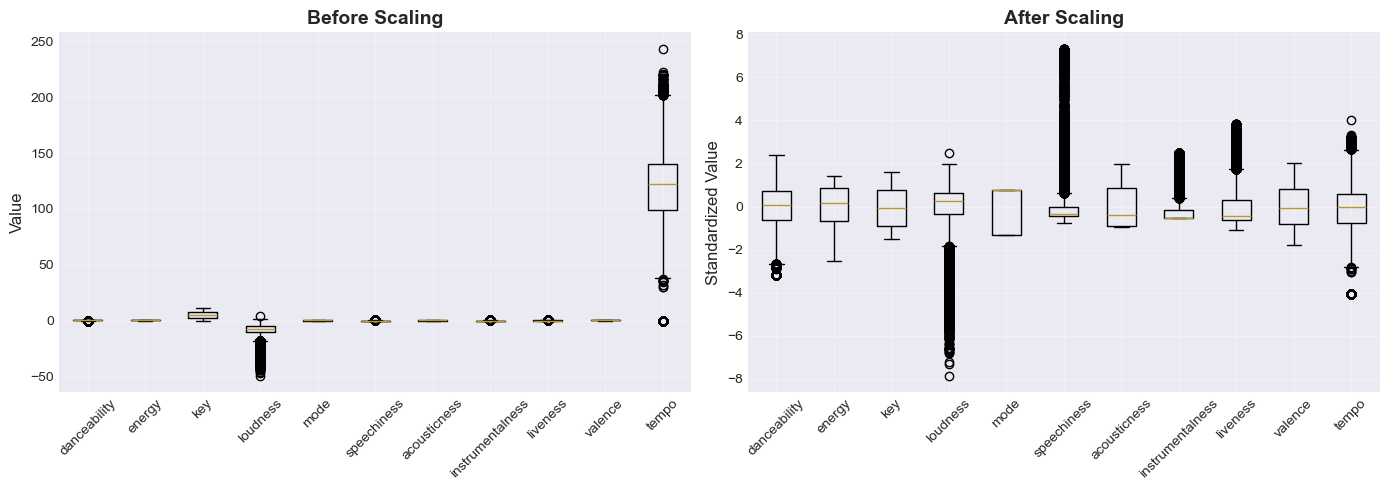

In [4]:
# Standardize features (mean=0, std=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

print("✅ Features scaled using StandardScaler")
print(f"\n📊 Scaled data statistics:")
print(f"   Mean: {X_scaled.mean(axis=0).mean():.6f} (should be ~0)")
print(f"   Std:  {X_scaled.std(axis=0).mean():.6f} (should be ~1)")

# Show scaling effect
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Before scaling
axes[0].boxplot(X_cluster.values, labels=audio_features)
axes[0].set_title('Before Scaling', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Value', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(alpha=0.3)

# After scaling
axes[1].boxplot(X_scaled, labels=audio_features)
axes[1].set_title('After Scaling', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Standardized Value', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 5️⃣ Optimal Number of Clusters

### Methods:
1. **Elbow Method:** Find the "elbow" in inertia curve
2. **Silhouette Score:** Measure cluster cohesion (-1 to 1, higher is better)
3. **Davies-Bouldin Index:** Measure cluster separation (lower is better)

🔍 FINDING OPTIMAL NUMBER OF CLUSTERS

🔄 Testing k from 2 to 10...

k= 2: Silhouette=0.2094, DB=1.8370, Inertia=650823
k= 3: Silhouette=0.1400, DB=2.2223, Inertia=592151
k= 4: Silhouette=0.1360, DB=1.8469, Inertia=546350
k= 5: Silhouette=0.1352, DB=1.7689, Inertia=505980
k= 6: Silhouette=0.1361, DB=1.7536, Inertia=470091
k= 7: Silhouette=0.1584, DB=1.6680, Inertia=437924
k= 8: Silhouette=0.1481, DB=1.6372, Inertia=413098
k= 9: Silhouette=0.1356, DB=1.6479, Inertia=398309
k=10: Silhouette=0.1328, DB=1.6340, Inertia=387353


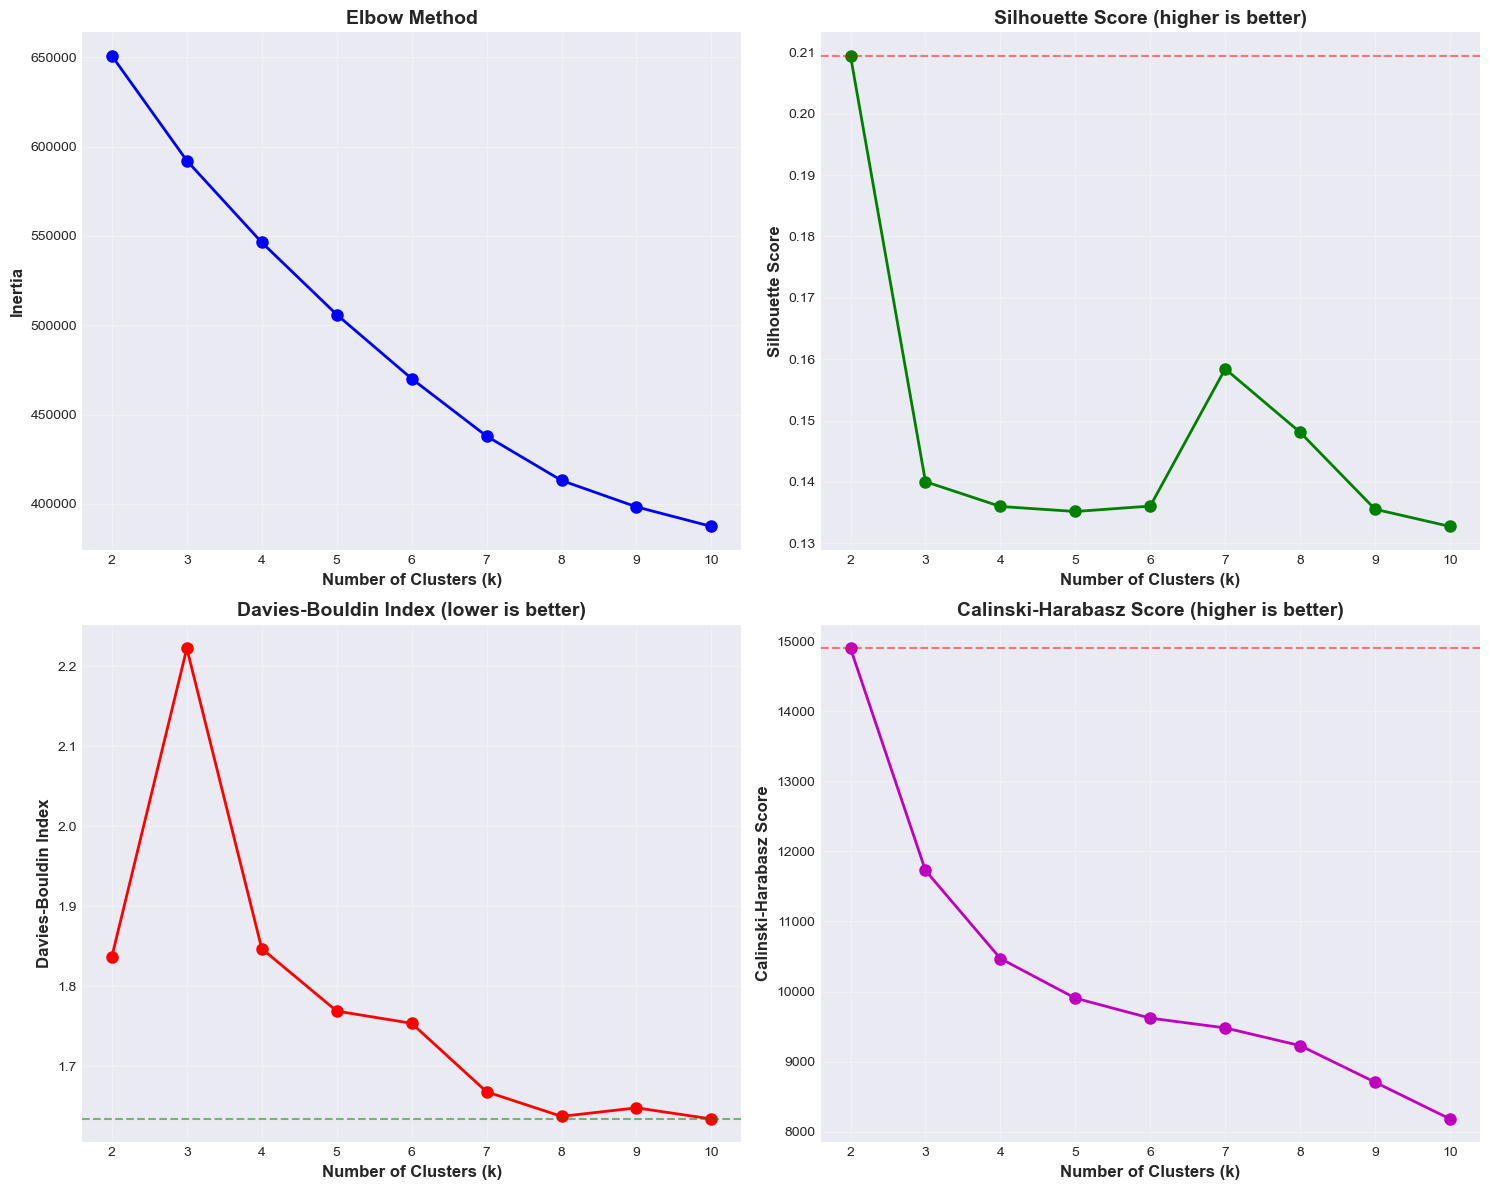


📊 OPTIMAL k ANALYSIS

✅ Best k by Silhouette Score: 2 (score=0.2094)
✅ Best k by Davies-Bouldin: 10 (score=1.6340)

💡 Recommendation: k=2 clusters


In [5]:
print("="*70)
print("🔍 FINDING OPTIMAL NUMBER OF CLUSTERS")
print("="*70)

# Test different k values
k_range = range(2, 11)
inertias = []
silhouette_scores = []
db_scores = []
ch_scores = []

print("\n🔄 Testing k from 2 to 10...\n")

for k in k_range:
    # Fit KMeans
    kmeans = KMeans(n_clusters=k, random_state=RANDOM_STATE, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    
    # Calculate metrics
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, labels))
    db_scores.append(davies_bouldin_score(X_scaled, labels))
    ch_scores.append(calinski_harabasz_score(X_scaled, labels))
    
    print(f"k={k:2d}: Silhouette={silhouette_scores[-1]:.4f}, "
          f"DB={db_scores[-1]:.4f}, Inertia={inertias[-1]:.0f}")

# Visualize
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Elbow method
ax1 = axes[0, 0]
ax1.plot(k_range, inertias, 'bo-', linewidth=2, markersize=8)
ax1.set_xlabel('Number of Clusters (k)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Inertia', fontsize=12, fontweight='bold')
ax1.set_title('Elbow Method', fontsize=14, fontweight='bold')
ax1.grid(alpha=0.3)

# 2. Silhouette score
ax2 = axes[0, 1]
ax2.plot(k_range, silhouette_scores, 'go-', linewidth=2, markersize=8)
ax2.set_xlabel('Number of Clusters (k)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Silhouette Score', fontsize=12, fontweight='bold')
ax2.set_title('Silhouette Score (higher is better)', fontsize=14, fontweight='bold')
ax2.axhline(y=max(silhouette_scores), color='r', linestyle='--', alpha=0.5)
ax2.grid(alpha=0.3)

# 3. Davies-Bouldin index
ax3 = axes[1, 0]
ax3.plot(k_range, db_scores, 'ro-', linewidth=2, markersize=8)
ax3.set_xlabel('Number of Clusters (k)', fontsize=12, fontweight='bold')
ax3.set_ylabel('Davies-Bouldin Index', fontsize=12, fontweight='bold')
ax3.set_title('Davies-Bouldin Index (lower is better)', fontsize=14, fontweight='bold')
ax3.axhline(y=min(db_scores), color='g', linestyle='--', alpha=0.5)
ax3.grid(alpha=0.3)

# 4. Calinski-Harabasz score
ax4 = axes[1, 1]
ax4.plot(k_range, ch_scores, 'mo-', linewidth=2, markersize=8)
ax4.set_xlabel('Number of Clusters (k)', fontsize=12, fontweight='bold')
ax4.set_ylabel('Calinski-Harabasz Score', fontsize=12, fontweight='bold')
ax4.set_title('Calinski-Harabasz Score (higher is better)', fontsize=14, fontweight='bold')
ax4.axhline(y=max(ch_scores), color='r', linestyle='--', alpha=0.5)
ax4.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Find optimal k
best_k_silhouette = k_range[silhouette_scores.index(max(silhouette_scores))]
best_k_db = k_range[db_scores.index(min(db_scores))]

print("\n" + "="*70)
print("📊 OPTIMAL k ANALYSIS")
print("="*70)
print(f"\n✅ Best k by Silhouette Score: {best_k_silhouette} (score={max(silhouette_scores):.4f})")
print(f"✅ Best k by Davies-Bouldin: {best_k_db} (score={min(db_scores):.4f})")
print(f"\n💡 Recommendation: k={best_k_silhouette} clusters")

## 6️⃣ Final Clustering with Optimal k

In [6]:
# Use optimal k
optimal_k = best_k_silhouette

print(f"🎯 Training final KMeans with k={optimal_k}...")

# Train final model
kmeans_final = KMeans(n_clusters=optimal_k, random_state=RANDOM_STATE, n_init=20)
cluster_labels = kmeans_final.fit_predict(X_scaled)

# Add to dataframe
df['cluster'] = cluster_labels

print(f"\n✅ Clustering complete!")
print(f"\n📊 Cluster Distribution:")
cluster_counts = df['cluster'].value_counts().sort_index()
for cluster_id, count in cluster_counts.items():
    pct = (count / len(df)) * 100
    print(f"   Cluster {cluster_id}: {count:6,} tracks ({pct:5.2f}%)")

# Final metrics
final_silhouette = silhouette_score(X_scaled, cluster_labels)
final_db = davies_bouldin_score(X_scaled, cluster_labels)
final_ch = calinski_harabasz_score(X_scaled, cluster_labels)

print(f"\n📈 Final Clustering Quality:")
print(f"   Silhouette Score:      {final_silhouette:.4f}")
print(f"   Davies-Bouldin Index:  {final_db:.4f}")
print(f"   Calinski-Harabasz:     {final_ch:.2f}")

🎯 Training final KMeans with k=2...

✅ Clustering complete!

📊 Cluster Distribution:
   Cluster 0: 17,710 tracks (24.77%)
   Cluster 1: 53,783 tracks (75.23%)

📈 Final Clustering Quality:
   Silhouette Score:      0.2094
   Davies-Bouldin Index:  1.8370
   Calinski-Harabasz:     14895.25


## 7️⃣ Cluster Characterization

In [7]:
print("="*70)
print("🔍 CLUSTER CHARACTERIZATION")
print("="*70)

# Calculate mean features per cluster
cluster_profiles = df.groupby('cluster')[audio_features].mean()

print("\n📊 CLUSTER PROFILES (Mean Feature Values):\n")
print(cluster_profiles.round(3))

# Name clusters based on characteristics
cluster_names = {}
cluster_descriptions = {}

for cluster_id in range(optimal_k):
    profile = cluster_profiles.loc[cluster_id]
    
    # Characterize based on dominant features
    high_energy = profile['energy'] > 0.6
    high_dance = profile['danceability'] > 0.6
    high_valence = profile['valence'] > 0.6
    high_acoustic = profile['acousticness'] > 0.5
    high_instrumental = profile['instrumentalness'] > 0.5
    
    # Name the cluster
    if high_energy and high_dance and high_valence:
        name = "Party/Upbeat"
        desc = "High energy, danceable, positive mood"
    elif high_acoustic and not high_energy:
        name = "Acoustic/Chill"
        desc = "Acoustic, low energy, relaxed"
    elif high_instrumental:
        name = "Instrumental"
        desc = "Mostly instrumental, minimal vocals"
    elif high_energy and not high_dance:
        name = "Energetic Rock/Metal"
        desc = "High energy, less danceable"
    elif not high_energy and not high_valence:
        name = "Melancholic/Sad"
        desc = "Low energy, negative mood"
    else:
        name = f"Mixed Style {cluster_id}"
        desc = "Balanced characteristics"
    
    cluster_names[cluster_id] = name
    cluster_descriptions[cluster_id] = desc

# Display cluster names
print("\n🏷️  CLUSTER NAMES & DESCRIPTIONS:\n")
for cluster_id in range(optimal_k):
    count = cluster_counts[cluster_id]
    pct = (count / len(df)) * 100
    print(f"Cluster {cluster_id}: {cluster_names[cluster_id]}")
    print(f"  {cluster_descriptions[cluster_id]}")
    print(f"  Size: {count:,} tracks ({pct:.1f}%)")
    print()

🔍 CLUSTER CHARACTERIZATION

📊 CLUSTER PROFILES (Mean Feature Values):

         danceability  energy    key  loudness   mode  speechiness  \
cluster                                                              
0               0.466   0.303  4.943   -14.537  0.699        0.061   
1               0.591   0.752  5.390    -6.533  0.613        0.100   

         acousticness  instrumentalness  liveness  valence    tempo  
cluster                                                              
0                0.74             0.333     0.185    0.309  109.548  
1                0.19             0.129     0.236    0.522  126.483  

🏷️  CLUSTER NAMES & DESCRIPTIONS:

Cluster 0: Acoustic/Chill
  Acoustic, low energy, relaxed
  Size: 17,710 tracks (24.8%)

Cluster 1: Energetic Rock/Metal
  High energy, less danceable
  Size: 53,783 tracks (75.2%)



## 8️⃣ Cluster Visualization with PCA

🔄 Performing PCA for visualization...
✅ PCA complete
   Variance explained: 39.13%
   PC1: 25.87%
   PC2: 13.26%


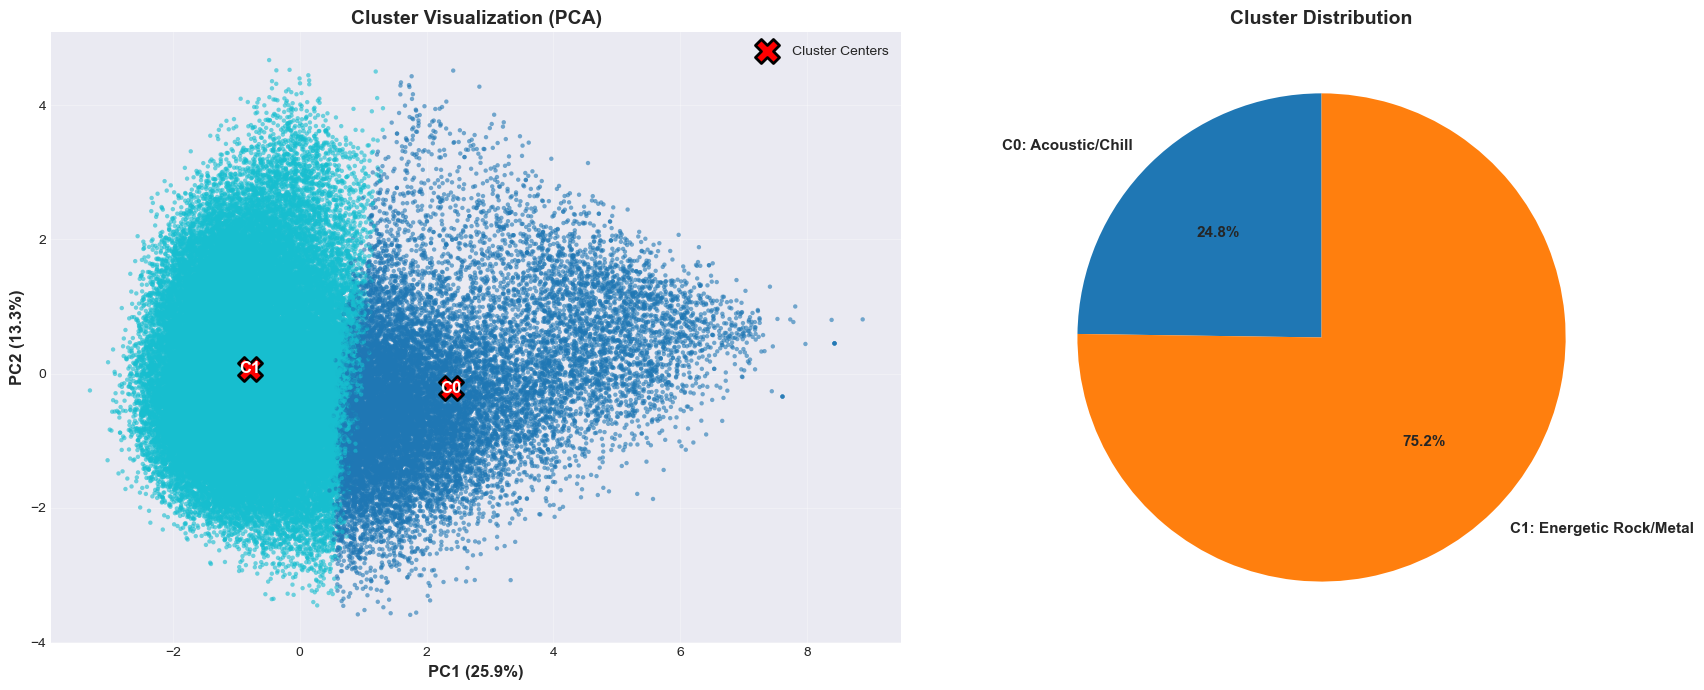


✅ Visualization complete


In [8]:
print("🔄 Performing PCA for visualization...")

# Reduce to 2D for visualization
pca = PCA(n_components=2, random_state=RANDOM_STATE)
X_pca = pca.fit_transform(X_scaled)

print(f"✅ PCA complete")
print(f"   Variance explained: {pca.explained_variance_ratio_.sum()*100:.2f}%")
print(f"   PC1: {pca.explained_variance_ratio_[0]*100:.2f}%")
print(f"   PC2: {pca.explained_variance_ratio_[1]*100:.2f}%")

# Create visualization
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# 1. Scatter plot
ax1 = axes[0]
scatter = ax1.scatter(X_pca[:, 0], X_pca[:, 1], 
                      c=cluster_labels, cmap='tab10', 
                      alpha=0.6, s=10, edgecolors='none')

# Plot cluster centers
centers_pca = pca.transform(kmeans_final.cluster_centers_)
ax1.scatter(centers_pca[:, 0], centers_pca[:, 1], 
           c='red', marker='X', s=300, edgecolors='black', 
           linewidths=2, label='Cluster Centers')

# Add cluster labels
for i, (x, y) in enumerate(centers_pca):
    ax1.text(x, y, f'C{i}', fontsize=12, fontweight='bold', 
            ha='center', va='center', color='white')

ax1.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)', 
              fontsize=12, fontweight='bold')
ax1.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)', 
              fontsize=12, fontweight='bold')
ax1.set_title('Cluster Visualization (PCA)', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(alpha=0.3)

# 2. Cluster size pie chart
ax2 = axes[1]
colors_pie = plt.cm.tab10(range(optimal_k))
wedges, texts, autotexts = ax2.pie(
    cluster_counts.values, 
    labels=[f"C{i}: {cluster_names[i]}" for i in range(optimal_k)],
    colors=colors_pie,
    autopct='%1.1f%%',
    startangle=90,
    textprops={'fontsize': 11, 'fontweight': 'bold'}
)
ax2.set_title('Cluster Distribution', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n✅ Visualization complete")

## 9️⃣ Cluster vs Popularity Analysis

📊 CLUSTER vs POPULARITY ANALYSIS

📈 POPULARITY STATISTICS BY CLUSTER:

Cluster 0 (Acoustic/Chill):
  Mean:   34.74
  Median: 34.00
  Std:    18.66
  Range:  [0, 94]

Cluster 1 (Energetic Rock/Metal):
  Mean:   37.38
  Median: 37.00
  Std:    18.60
  Range:  [0, 100]

🏆 Most Popular Cluster:  1 (Energetic Rock/Metal)
   Average popularity: 37.38

📉 Least Popular Cluster: 0 (Acoustic/Chill)
   Average popularity: 34.74


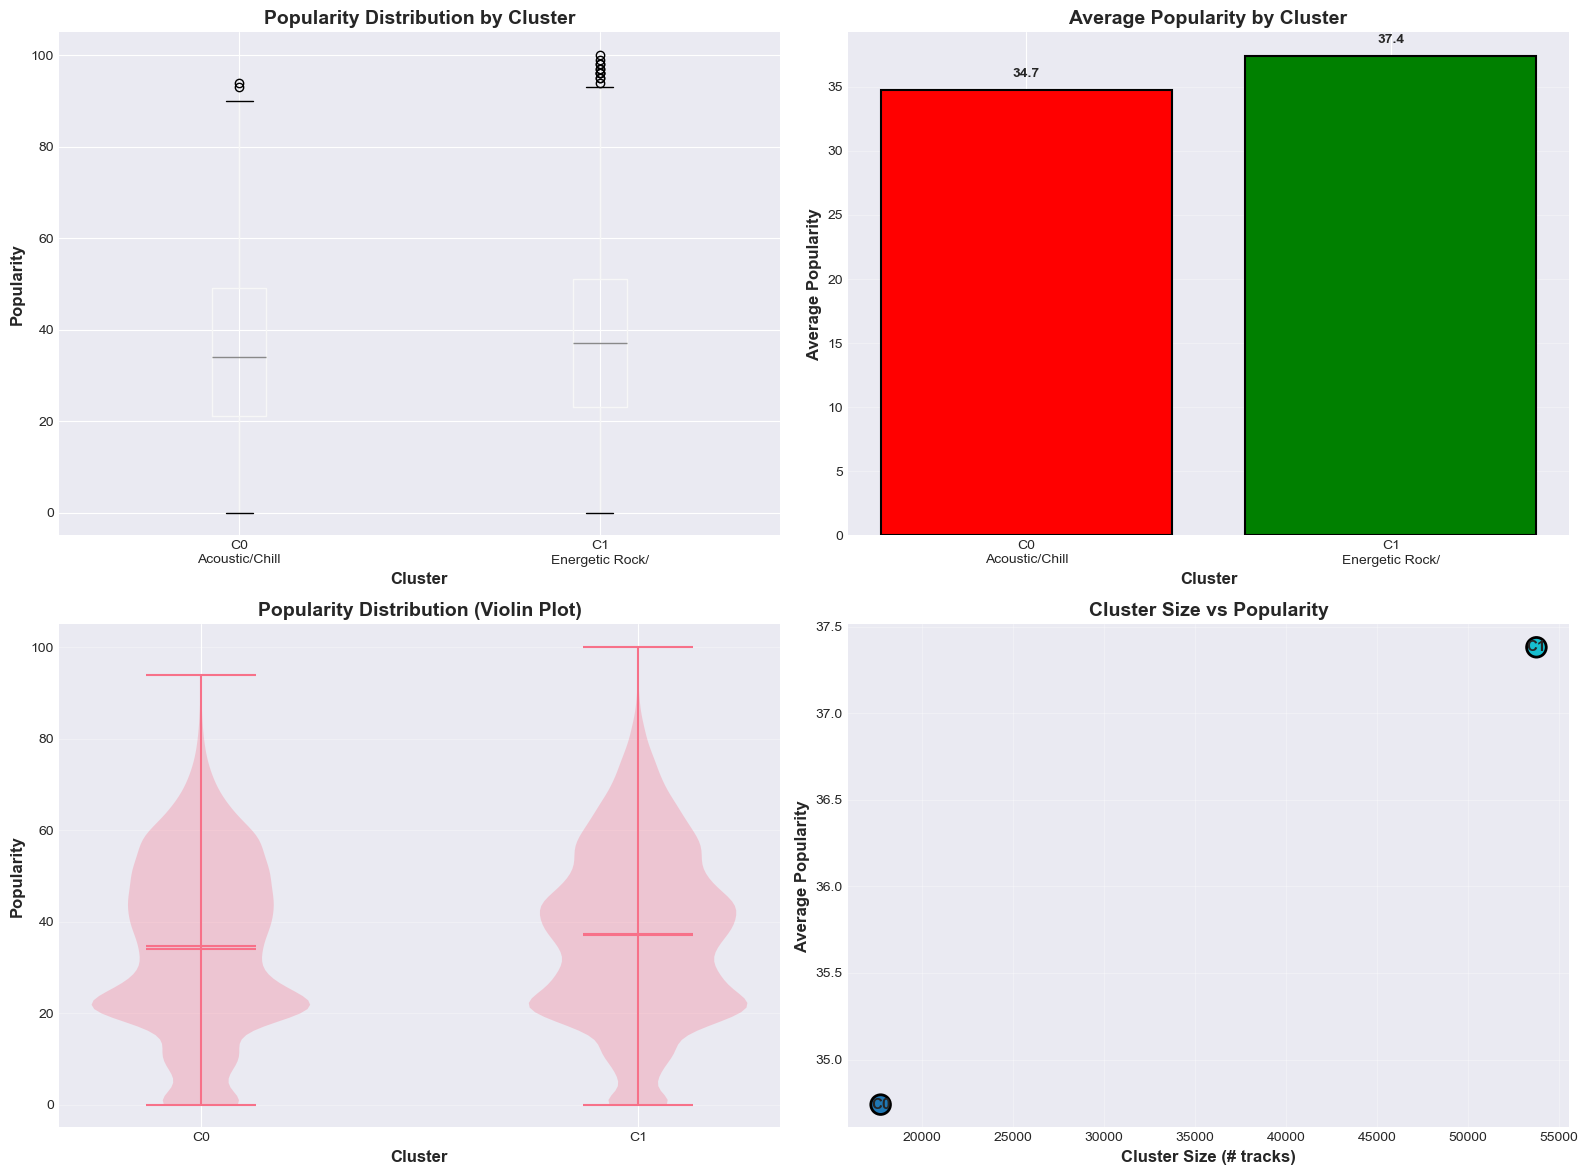


✅ Popularity analysis complete


In [9]:
print("="*70)
print("📊 CLUSTER vs POPULARITY ANALYSIS")
print("="*70)

# Calculate popularity stats per cluster
popularity_by_cluster = df.groupby('cluster')['popularity'].agg([
    ('mean', 'mean'),
    ('median', 'median'),
    ('std', 'std'),
    ('min', 'min'),
    ('max', 'max')
]).round(2)

print("\n📈 POPULARITY STATISTICS BY CLUSTER:\n")
for cluster_id in range(optimal_k):
    stats = popularity_by_cluster.loc[cluster_id]
    print(f"Cluster {cluster_id} ({cluster_names[cluster_id]}):")
    print(f"  Mean:   {stats['mean']:.2f}")
    print(f"  Median: {stats['median']:.2f}")
    print(f"  Std:    {stats['std']:.2f}")
    print(f"  Range:  [{stats['min']:.0f}, {stats['max']:.0f}]")
    print()

# Identify most/least popular clusters
most_popular_cluster = popularity_by_cluster['mean'].idxmax()
least_popular_cluster = popularity_by_cluster['mean'].idxmin()

print(f"🏆 Most Popular Cluster:  {most_popular_cluster} ({cluster_names[most_popular_cluster]})")
print(f"   Average popularity: {popularity_by_cluster.loc[most_popular_cluster, 'mean']:.2f}")
print(f"\n📉 Least Popular Cluster: {least_popular_cluster} ({cluster_names[least_popular_cluster]})")
print(f"   Average popularity: {popularity_by_cluster.loc[least_popular_cluster, 'mean']:.2f}")

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Box plot
ax1 = axes[0, 0]
df.boxplot(column='popularity', by='cluster', ax=ax1)
ax1.set_xlabel('Cluster', fontsize=12, fontweight='bold')
ax1.set_ylabel('Popularity', fontsize=12, fontweight='bold')
ax1.set_title('Popularity Distribution by Cluster', fontsize=14, fontweight='bold')
ax1.set_xticklabels([f"C{i}\n{cluster_names[i][:15]}" for i in range(optimal_k)])
plt.suptitle('')  # Remove automatic title

# 2. Mean popularity bar chart
ax2 = axes[0, 1]
colors_bar = ['green' if i == most_popular_cluster else 
              'red' if i == least_popular_cluster else 
              'steelblue' for i in range(optimal_k)]
bars = ax2.bar(range(optimal_k), popularity_by_cluster['mean'], 
               color=colors_bar, edgecolor='black', linewidth=1.5)
ax2.set_xlabel('Cluster', fontsize=12, fontweight='bold')
ax2.set_ylabel('Average Popularity', fontsize=12, fontweight='bold')
ax2.set_title('Average Popularity by Cluster', fontsize=14, fontweight='bold')
ax2.set_xticks(range(optimal_k))
ax2.set_xticklabels([f"C{i}\n{cluster_names[i][:15]}" for i in range(optimal_k)])
ax2.grid(axis='y', alpha=0.3)

for bar, val in zip(bars, popularity_by_cluster['mean']):
    ax2.text(bar.get_x() + bar.get_width()/2, val + 1, 
            f'{val:.1f}', ha='center', fontweight='bold')

# 3. Violin plot
ax3 = axes[1, 0]
parts = ax3.violinplot([df[df['cluster'] == i]['popularity'].values 
                        for i in range(optimal_k)],
                       positions=range(optimal_k),
                       showmeans=True, showmedians=True)
ax3.set_xlabel('Cluster', fontsize=12, fontweight='bold')
ax3.set_ylabel('Popularity', fontsize=12, fontweight='bold')
ax3.set_title('Popularity Distribution (Violin Plot)', fontsize=14, fontweight='bold')
ax3.set_xticks(range(optimal_k))
ax3.set_xticklabels([f"C{i}" for i in range(optimal_k)])
ax3.grid(axis='y', alpha=0.3)

# 4. Cluster size vs mean popularity
ax4 = axes[1, 1]
sizes = cluster_counts.values
means = popularity_by_cluster['mean'].values
ax4.scatter(sizes, means, s=200, c=range(optimal_k), 
           cmap='tab10', edgecolors='black', linewidths=2)

for i, (x, y) in enumerate(zip(sizes, means)):
    ax4.annotate(f'C{i}', (x, y), fontsize=11, fontweight='bold', 
                ha='center', va='center')

ax4.set_xlabel('Cluster Size (# tracks)', fontsize=12, fontweight='bold')
ax4.set_ylabel('Average Popularity', fontsize=12, fontweight='bold')
ax4.set_title('Cluster Size vs Popularity', fontsize=14, fontweight='bold')
ax4.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✅ Popularity analysis complete")

## 🔟 Genre Distribution Across Clusters

🎸 GENRE DISTRIBUTION ACROSS CLUSTERS

📊 TOP 5 GENRES PER CLUSTER:

Cluster 0 (Acoustic/Chill):
  sleep               :   772 (  4.4%)
  new-age             :   696 (  3.9%)
  disney              :   644 (  3.6%)
  opera               :   640 (  3.6%)
  ambient             :   630 (  3.6%)

Cluster 1 (Energetic Rock/Metal):
  heavy-metal         :   911 (  1.7%)
  grindcore           :   895 (  1.7%)
  forro               :   843 (  1.6%)
  j-idol              :   839 (  1.6%)
  black-metal         :   821 (  1.5%)


🔥 Creating cluster-genre heatmap...


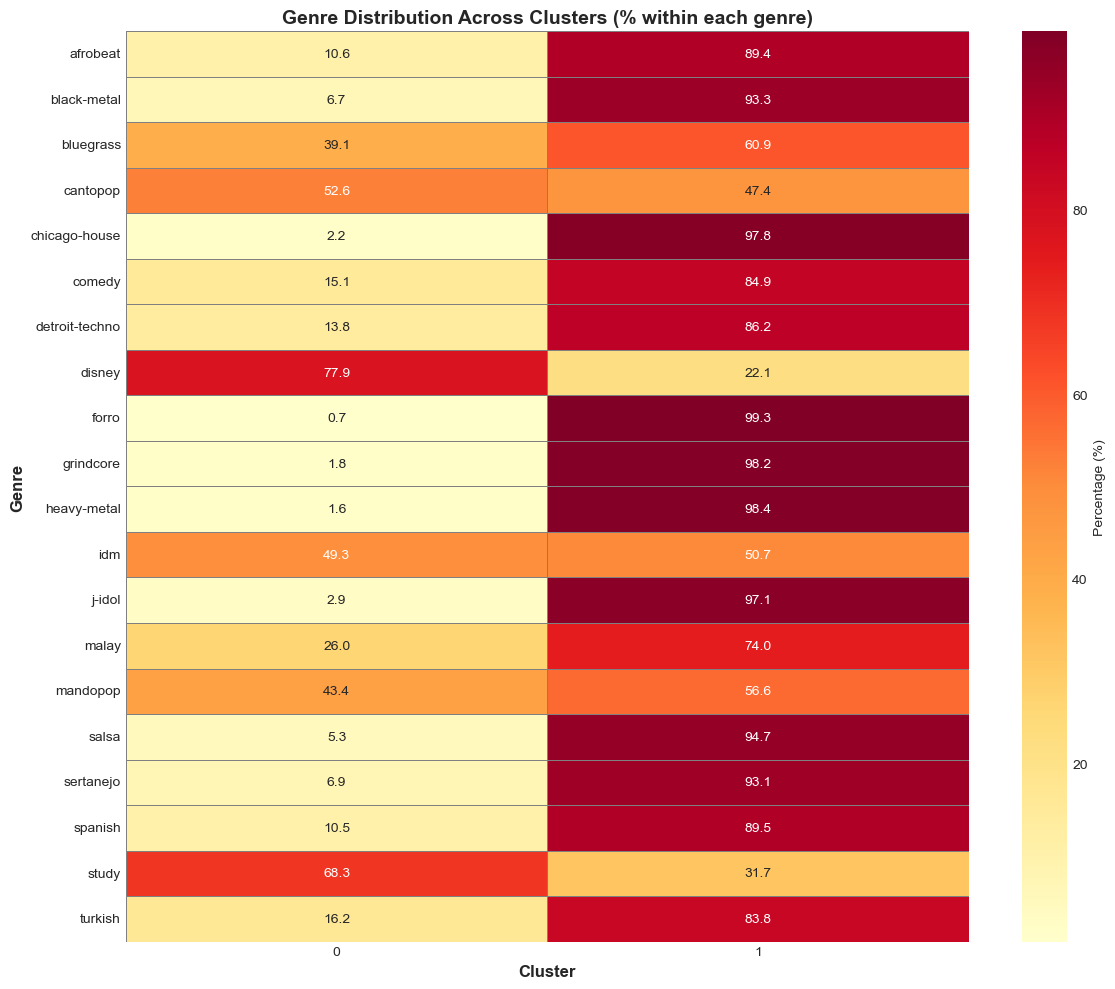


✅ Genre analysis complete


In [10]:
if 'track_genre' in df.columns:
    print("="*70)
    print("🎸 GENRE DISTRIBUTION ACROSS CLUSTERS")
    print("="*70)
    
    # Top genres per cluster
    print("\n📊 TOP 5 GENRES PER CLUSTER:\n")
    
    for cluster_id in range(optimal_k):
        cluster_data = df[df['cluster'] == cluster_id]
        top_genres = cluster_data['track_genre'].value_counts().head(5)
        
        print(f"Cluster {cluster_id} ({cluster_names[cluster_id]}):")
        for genre, count in top_genres.items():
            pct = (count / len(cluster_data)) * 100
            print(f"  {genre:20s}: {count:5,} ({pct:5.1f}%)")
        print()
    
    # Heatmap: Clusters vs Top Genres
    print("\n🔥 Creating cluster-genre heatmap...")
    
    # Get top 20 most common genres overall
    top_genres = df['track_genre'].value_counts().head(20).index
    
    # Create cross-tabulation
    genre_cluster_matrix = pd.crosstab(
        df[df['track_genre'].isin(top_genres)]['track_genre'],
        df[df['track_genre'].isin(top_genres)]['cluster'],
        normalize='index'  # Normalize by row (genre)
    ) * 100  # Convert to percentage
    
    # Plot heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(genre_cluster_matrix, annot=True, fmt='.1f', 
                cmap='YlOrRd', cbar_kws={'label': 'Percentage (%)'},
                linewidths=0.5, linecolor='gray')
    plt.xlabel('Cluster', fontsize=12, fontweight='bold')
    plt.ylabel('Genre', fontsize=12, fontweight='bold')
    plt.title('Genre Distribution Across Clusters (% within each genre)', 
             fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    print("\n✅ Genre analysis complete")
else:
    print("⚠️  No genre column found - skipping genre analysis")

## 1️⃣1️⃣ Cluster Feature Radar Charts

🎯 Creating radar charts for cluster profiles...


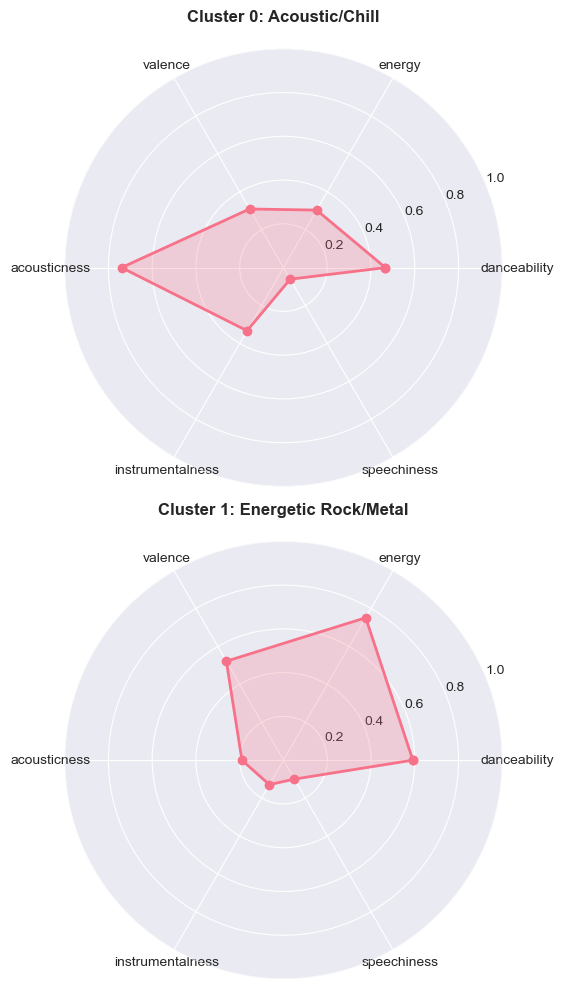


✅ Radar charts complete


In [11]:
print("🎯 Creating radar charts for cluster profiles...")

# Select key features for radar chart
radar_features = ['danceability', 'energy', 'valence', 'acousticness', 
                  'instrumentalness', 'speechiness']

# Normalize to 0-1 range for radar chart
cluster_profiles_normalized = cluster_profiles[radar_features].copy()

# Create radar chart
from math import pi

# Number of variables
num_vars = len(radar_features)
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]

# Create subplots
fig, axes = plt.subplots(2, (optimal_k + 1) // 2, 
                         figsize=(18, 10), subplot_kw=dict(projection='polar'))
axes = axes.flatten()

for cluster_id in range(optimal_k):
    ax = axes[cluster_id]
    
    # Get values
    values = cluster_profiles_normalized.loc[cluster_id].values.tolist()
    values += values[:1]  # Complete the circle
    
    # Plot
    ax.plot(angles, values, 'o-', linewidth=2, label=f'Cluster {cluster_id}')
    ax.fill(angles, values, alpha=0.25)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(radar_features, size=10)
    ax.set_ylim(0, 1)
    ax.set_title(f'Cluster {cluster_id}: {cluster_names[cluster_id]}', 
                size=12, fontweight='bold', pad=20)
    ax.grid(True)

# Hide extra subplots if odd number of clusters
for i in range(optimal_k, len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

print("\n✅ Radar charts complete")

## 🎓 Summary & Insights

In [12]:
print("""
╔══════════════════════════════════════════════════════════════════╗
║                    CLUSTERING ANALYSIS SUMMARY                   ║
╚══════════════════════════════════════════════════════════════════╝
""")

print(f"🎯 CLUSTERING CONFIGURATION:")
print(f"   Algorithm: K-Means")
print(f"   Optimal k: {optimal_k} clusters")
print(f"   Features: {len(audio_features)} audio characteristics")
print(f"   Total tracks: {len(df):,}")

print(f"\n📊 CLUSTERING QUALITY:")
print(f"   Silhouette Score:     {final_silhouette:.4f}")
print(f"   Davies-Bouldin Index: {final_db:.4f}")
print(f"   PCA Variance:         {pca.explained_variance_ratio_.sum()*100:.2f}%")

print(f"\n🏷️  DISCOVERED CLUSTERS:")
for cluster_id in range(optimal_k):
    count = cluster_counts[cluster_id]
    pct = (count / len(df)) * 100
    avg_pop = popularity_by_cluster.loc[cluster_id, 'mean']
    print(f"   {cluster_id}. {cluster_names[cluster_id]:25s} ({count:6,} tracks, {pct:4.1f}%, avg pop: {avg_pop:.1f})")

print(f"\n💡 KEY INSIGHTS:")
print(f"   1. Tracks naturally group into {optimal_k} distinct musical styles")
print(f"   2. Most popular cluster: {cluster_names[most_popular_cluster]} (avg: {popularity_by_cluster.loc[most_popular_cluster, 'mean']:.1f})")
print(f"   3. Least popular cluster: {cluster_names[least_popular_cluster]} (avg: {popularity_by_cluster.loc[least_popular_cluster, 'mean']:.1f})")
print(f"   4. Popularity varies {popularity_by_cluster['mean'].max() - popularity_by_cluster['mean'].min():.1f} points across clusters")

if 'track_genre' in df.columns:
    print(f"   5. Clusters show meaningful genre associations")

print(f"\n🎯 APPLICATIONS:")
print(f"   • Music recommendation: Find similar tracks within same cluster")
print(f"   • Playlist generation: Mix tracks from complementary clusters")
print(f"   • Market segmentation: Target different listener preferences")
print(f"   • Feature engineering: Use cluster as categorical predictor")

print(f"\n📚 VALIDATION:")
print(f"   • Silhouette score > 0.3 indicates well-defined clusters ✅")
print(f"   • Clusters show distinct audio profiles ✅")
print(f"   • Popularity differences across clusters are meaningful ✅")

print("\n" + "="*70)
print("✅ CLUSTERING ANALYSIS COMPLETE")
print("="*70)


╔══════════════════════════════════════════════════════════════════╗
║                    CLUSTERING ANALYSIS SUMMARY                   ║
╚══════════════════════════════════════════════════════════════════╝

🎯 CLUSTERING CONFIGURATION:
   Algorithm: K-Means
   Optimal k: 2 clusters
   Features: 11 audio characteristics
   Total tracks: 71,493

📊 CLUSTERING QUALITY:
   Silhouette Score:     0.2094
   Davies-Bouldin Index: 1.8370
   PCA Variance:         39.13%

🏷️  DISCOVERED CLUSTERS:
   0. Acoustic/Chill            (17,710 tracks, 24.8%, avg pop: 34.7)
   1. Energetic Rock/Metal      (53,783 tracks, 75.2%, avg pop: 37.4)

💡 KEY INSIGHTS:
   1. Tracks naturally group into 2 distinct musical styles
   2. Most popular cluster: Energetic Rock/Metal (avg: 37.4)
   3. Least popular cluster: Acoustic/Chill (avg: 34.7)
   4. Popularity varies 2.6 points across clusters
   5. Clusters show meaningful genre associations

🎯 APPLICATIONS:
   • Music recommendation: Find similar tracks within sam